In [ ]:
import sqlite3
import os
import csv

if os.path.exists('/content/heart_disease_data.db'):
  os.remove('/content/heart_disease_data.db')

# Connect to the SQLite database
conn = sqlite3.connect('heart_disease_data.db')
conn.execute("PRAGMA foreign_keys = 1")  # Enable foreign key constraints
cursor = conn.cursor()

# Create tables

general_info_table_query = '''
CREATE TABLE IF NOT EXISTS GeneralInfo (
    GeneralInfoID INTEGER PRIMARY KEY NOT NULL,
    State TEXT,
    Sex TEXT,
    AgeCategory TEXT,
    RaceEthnicityCategory TEXT,
    HeightInMeters INTEGER,
    WeightInKilograms INTEGER,
    BMI INTEGER
);
'''

health_condition_table_query = '''
CREATE TABLE IF NOT EXISTS HealthCondition (
    HealthConditionID INTEGER PRIMARY KEY NOT NULL,
    GeneralInfoID INTEGER NOT NULL,
    MedicalScreeningID INTEGER NOT NULL,
    GeneralHealth TEXT,
    PhysicalHealthDays INTEGER,
    MentalHealthDays INTEGER,
    RemovedTeeth TEXT,
    HadHeartAttack TEXT,
    HadAngina TEXT,
    HadStroke TEXT,
    HadAsthma TEXT,
    HadSkinCancer TEXT,
    HadCOPD TEXT,
    HadDepressiveDisorder TEXT,
    HadKidneyDisease TEXT,
    HadArthritis TEXT,
    HadDiabetes TEXT,
    DeafOrHardOfHearing TEXT,
    BlindOrVisionDifficulty TEXT,
    DifficultyConcentrating TEXT,
    DifficultyWalking TEXT,
    DifficultyDressingBathing TEXT,
    DifficultyErrands TEXT,
    FOREIGN KEY (GeneralInfoID) REFERENCES GeneralInfo(GeneralInfoID),
    FOREIGN KEY (MedicalScreeningID) REFERENCES MedicalScreening(MedicalScreeningID)
);
'''


health_behavior_table_query = '''
CREATE TABLE IF NOT EXISTS HealthBehavior (
    HealthBehaviorID INTEGER PRIMARY KEY NOT NULL,
    HealthConditionID INTEGER NOT NULL,
    MedicalScreeningID INTEGER NOT NULL,
    PhysicalActivities TEXT,
    SleepHours INTEGER,
    SmokerStatus TEXT,
    ECigaretteUsage TEXT,
    AlcoholDrinkers TEXT,
    FOREIGN KEY (HealthConditionID) REFERENCES HealthCondition(HealthConditionID),
    FOREIGN KEY (MedicalScreeningID) REFERENCES MedicalScreening(MedicalScreeningID)
);
'''

medical_screening_table_query = '''
CREATE TABLE IF NOT EXISTS MedicalScreening (
    MedicalScreeningID INTEGER PRIMARY KEY NOT NULL,
    GeneralInfoID INTEGER NOT NULL,
    LastCheckupTime TEXT,
    HIVTesting TEXT,
    FluVaxLast12 TEXT,
    PneumoVaxEver TEXT,
    TetanusLast10Tdap TEXT,
    HighRiskLastYear TEXT,
    CovidPos TEXT,
    ChestScan TEXT,
    FOREIGN KEY (GeneralInfoID) REFERENCES GeneralInfo(GeneralInfoID)
);
'''

# Execute SQL queries to create tables
cursor.execute("DROP TABLE IF EXISTS GeneralInfo;")
cursor.execute(general_info_table_query)
cursor.execute("DROP TABLE IF EXISTS HealthCondition;")
cursor.execute(health_condition_table_query)
cursor.execute("DROP TABLE IF EXISTS HealthBehavior;")
cursor.execute(health_behavior_table_query)
cursor.execute("DROP TABLE IF EXISTS MedicalScreening;")
cursor.execute(medical_screening_table_query)




# Read CSV file
csv_file_path = '/content/heart_2022.csv'

header = True
head = []
general_info_data = []
health_condition_data = []
health_behavior_data = []
medical_screening_data = []
MedicalScreeningID = 1
general_info_id = 1
health_behavior_id = 1
health_condition_id = 1

with open(csv_file_path) as file:
  csv_reader = csv.reader(file)
  for line in csv_reader:

    if header:
      header = False
      head = line
    else:
      general_info_data.append([general_info_id,
            line[head.index('State')],
            line[head.index('Sex')],
            line[head.index('AgeCategory')],
            line[head.index('RaceEthnicityCategory')],
            line[head.index('HeightInMeters')],
            line[head.index('WeightInKilograms')],
            line[head.index('BMI')]])
      health_condition_data.append([
            health_condition_id,
            MedicalScreeningID,  # Assuming 'MedicalScreeningID' is present in the CSV data
            general_info_id,  # Assuming 'GeneralInfoID' is present in the CSV data
            line[head.index('GeneralHealth')],
            line[head.index('PhysicalHealthDays')],
            line[head.index('MentalHealthDays')],
            line[head.index('RemovedTeeth')],
            line[head.index('HadHeartAttack')],
            line[head.index('HadAngina')],
            line[head.index('HadStroke')],
            line[head.index('HadAsthma')],
            line[head.index('HadSkinCancer')],
            line[head.index('HadCOPD')],
            line[head.index('HadDepressiveDisorder')],
            line[head.index('HadKidneyDisease')],
            line[head.index('HadArthritis')],
            line[head.index('HadDiabetes')],
            line[head.index('DeafOrHardOfHearing')],
            line[head.index('BlindOrVisionDifficulty')],
            line[head.index('DifficultyConcentrating')],
            line[head.index('DifficultyWalking')],
            line[head.index('DifficultyDressingBathing')],
            line[head.index('DifficultyErrands')]
        ])

      health_behavior_data.append([
            health_behavior_id,
            health_condition_id,  # Assuming 'HealthConditionID' is present in the CSV data
            MedicalScreeningID,  # Assuming 'MedicalScreeningID' is present in the CSV data
            line[head.index('PhysicalActivities')],
            line[head.index('SleepHours')],
            line[head.index('SmokerStatus')],
            line[head.index('ECigaretteUsage')],
            line[head.index('AlcoholDrinkers')]
        ])
      medical_screening_data.append([
            MedicalScreeningID,
            general_info_id,  # Assuming 'GeneralInfoID' is present in the CSV data
            line[head.index('LastCheckupTime')],
            line[head.index('HIVTesting')],
            line[head.index('FluVaxLast12')],
            line[head.index('PneumoVaxEver')],
            line[head.index('TetanusLast10Tdap')],
            line[head.index('HighRiskLastYear')],
            line[head.index('CovidPos')],
            line[head.index('ChestScan')]
        ])

      health_behavior_id += 1
      MedicalScreeningID += 1
      health_condition_id += 1
      general_info_id += 1





# Insert data into tables
general_info_insert_query = '''
INSERT INTO GeneralInfo (GeneralInfoID, State, Sex, AgeCategory, RaceEthnicityCategory, HeightInMeters, WeightInKilograms, BMI)
VALUES (?, ?, ?, ?, ?, ?, ?, ?);
'''

health_condition_insert_query = '''
INSERT INTO HealthCondition (HealthConditionID, GeneralInfoID, MedicalScreeningID, GeneralHealth, PhysicalHealthDays, MentalHealthDays,
                             RemovedTeeth, HadHeartAttack, HadAngina, HadStroke, HadAsthma, HadSkinCancer, HadCOPD, HadDepressiveDisorder, HadKidneyDisease,
                             HadArthritis,  HadDiabetes,
                             DeafOrHardOfHearing, BlindOrVisionDifficulty, DifficultyConcentrating,
                             DifficultyWalking, DifficultyDressingBathing, DifficultyErrands)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
'''

health_behavior_insert_query = '''
INSERT INTO HealthBehavior (HealthBehaviorID, HealthConditionID, MedicalScreeningID, PhysicalActivities, SleepHours, SmokerStatus,
                             ECigaretteUsage, AlcoholDrinkers)
VALUES (?, ?, ?, ?, ?, ?, ?, ?);
'''

medical_screening_insert_query = '''
INSERT INTO MedicalScreening (MedicalScreeningID, GeneralInfoID, LastCheckupTime, HIVTesting, FluVaxLast12, PneumoVaxEver,
                               TetanusLast10Tdap, HighRiskLastYear, CovidPos, ChestScan)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
'''

# Insert data into tables
cursor.executemany(general_info_insert_query, general_info_data)
cursor.executemany(medical_screening_insert_query, medical_screening_data)
cursor.executemany(health_condition_insert_query, health_condition_data)
cursor.executemany(health_behavior_insert_query, health_behavior_data)


# Commit changes and close connection
conn.commit()
conn.close()

It creates an SQLite database named 'heart_disease_data.db' and populates it with data from a CSV file named 'heart_2022.csv'. It defines the database schema with four tables ('GeneralInfo', 'HealthCondition', 'HealthBehavior', 'MedicalScreening'), establishes a connection to the database, reads data from the CSV file, inserts the data into the respective tables, and then commits the changes before closing the database connection. This sets up the foundation for further analysis or modeling tasks related to heart disease prediction.

ER Diagrams for the tables:

             +-------------------+             +---------------------+
             | GeneralInfo       |             | HealthCondition     |
             +-------------------+             +---------------------+
             | GeneralInfoID [PK]|<---+        | HealthConditionID [PK]|
             | State             |    |        | GeneralInfoID [FK]   |
             | Sex               |    +------->| MedicalScreeningID [FK]|
             | AgeCategory       |             | GeneralHealth       |
             | RaceEthnicityCategory |          | PhysicalHealthDays  |
             | HeightInMeters    |             | MentalHealthDays    |
             | WeightInKilograms |             | RemovedTeeth        |
             | BMI               |             | HadHeartAttack      |
             +-------------------+             | HadAngina           |
                                                | ...                 |
                                                +---------------------+

             +-------------------+             +---------------------+
             | HealthBehavior    |             | MedicalScreening    |
             +-------------------+             +---------------------+
             | HealthBehaviorID [PK]|          | MedicalScreeningID [PK]|
             | HealthConditionID [FK]|<--------+| GeneralInfoID [FK]   |
             | MedicalScreeningID [FK]|         | LastCheckupTime      |
             | PhysicalActivities |            | HIVTesting           |
             | SleepHours        |            | FluVaxLast12         |
             | SmokerStatus      |            | PneumoVaxEver        |
             | ECigaretteUsage   |            | TetanusLast10Tdap    |
             | AlcoholDrinkers   |            | HighRiskLastYear     |
             +-------------------+            | CovidPos             |
                                               | ChestScan            |
                                               +---------------------+


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Connect to the SQLite database
conn = sqlite3.connect('heart_disease_data.db')

# SQL statement to fetch data using joins
sql_query = '''
SELECT *
FROM GeneralInfo gi
LEFT JOIN HealthCondition hc ON gi.GeneralInfoID = hc.GeneralInfoID
LEFT JOIN HealthBehavior hb ON hc.HealthConditionID = hb.HealthConditionID
LEFT JOIN MedicalScreening ms ON gi.GeneralInfoID = ms.GeneralInfoID;
'''

# Fetch data into a Pandas DataFrame
df = pd.read_sql_query(sql_query, conn)
df = df.loc[:, ~df.columns.duplicated()]
#print(df[:5])
# Close connection
conn.close()

#source = df.drop('HadHeartAttack', axis=1)
df=df.head(20000)
source = df
target = df['HadHeartAttack']

train, test = train_test_split(source, test_size = 0.2, random_state = 42,
                                      stratify=target)

#print(type(train))


It connects to an SQLite database named 'heart_disease_data.db' and fetches data using SQL joins from multiple tables ('GeneralInfo', 'HealthCondition', 'HealthBehavior', 'MedicalScreening') into a Pandas DataFrame. It then subsets the data to the first 20,000 rows, splits it into training and testing sets for machine learning, and assigns the 'HadHeartAttack' column as the target variable.

In [ ]:
null_counts = train.isnull().sum()

# Count missing values (including empty strings) in every column
missing_counts = train.apply(lambda x:x == '').sum()

# Replace null values with a specific value (e.g., -1)
#df_filled = train.fillna(-1)
# Convert empty strings to 0
df_filled = train.replace('', np.nan)
#df['HadHeartAttack']=t
print("\nDataFrame with null values replaced and empty strings converted to 0:")
print(df_filled)


DataFrame with null values replaced and empty strings converted to 0:
       GeneralInfoID    State     Sex      AgeCategory  \
8289            8290   Alaska  Female     Age 70 to 74   
1042            1043  Alabama  Female     Age 65 to 69   
19758          19759  Arizona  Female     Age 55 to 59   
12257          12258  Arizona  Female  Age 80 or older   
1192            1193  Alabama  Female              NaN   
...              ...      ...     ...              ...   
4326            4327  Alabama    Male     Age 75 to 79   
14861          14862  Arizona    Male     Age 60 to 64   
5641            5642   Alaska  Female     Age 60 to 64   
15706          15707  Arizona    Male     Age 55 to 59   
19482          19483  Arizona    Male     Age 55 to 59   

               RaceEthnicityCategory  HeightInMeters  WeightInKilograms  \
8289   Other race only, Non-Hispanic             NaN              73.03   
1042        White only, Non-Hispanic            1.80              99.79   
19758  

It calculates the count of missing values (including empty strings) in every column of the 'train' DataFrame and replaces empty strings with NaN (Not a Number) using NumPy. It then prints the modified DataFrame, where null values have been replaced and empty strings converted to NaN.

In [ ]:
columns_to_convert = ['GeneralInfoID','HealthConditionID','MedicalScreeningID','HealthBehaviorID','PhysicalHealthDays','MentalHealthDays','SleepHours','HeightInMeters','WeightInKilograms','BMI']

# Convert each column to numeric type, treating non-numeric values as NaN
for column in columns_to_convert:
    df_filled[column] = pd.to_numeric(df_filled[column], errors='coerce')

#df['HadHeartAttack'] = pd.to_numeric(df['HadHeartAttack'], errors='coerce')
print(df_filled['HeightInMeters'].unique())

[ nan 1.8  1.57 1.5  1.7  1.68 1.6  1.78 1.83 1.75 1.93 1.65 1.85 1.55
 1.52 1.73 1.91 1.63 1.88 1.47 1.42 1.54 1.98 1.82 1.14 1.72 2.03 1.96
 1.22 1.74 2.01 1.56 1.87 1.67 1.64 1.45 1.49 1.62 2.16 1.9  1.76 1.69
 1.79 1.35 1.61 1.37 0.91 1.4  1.53 1.71 2.06 1.3  2.26 1.24 1.84 1.59
 1.46 2.11]


It converts specific columns in a DataFrame named 'df_filled' to numeric data type, treating non-numeric values as NaN. The columns to be converted are listed in 'columns_to_convert'. After conversion, it prints the unique values of the 'HeightInMeters' column to verify the conversion.

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title = 'Profiling Report')
profile

Output hidden; open in https://colab.research.google.com to view.

It generates a comprehensive profiling report for the DataFrame 'df' using the ydata_profiling library. The ProfileReport function creates a report that includes statistics, histograms, correlations, missing values, and much more, providing insights into the structure and characteristics of the dataset.

In [ ]:
column_types = df_filled.dtypes
categorical_columns = column_types[column_types == 'object'].index.tolist()
numerical_columns = column_types[column_types != 'object'].index.tolist()
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory', 'GeneralHealth', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'LastCheckupTime', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'ChestScan']
Numerical columns: ['GeneralInfoID', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'HealthConditionID', 'MedicalScreeningID', 'PhysicalHealthDays', 'MentalHealthDays', 'HealthBehaviorID', 'SleepHours']


It categorizes columns in the DataFrame 'df_filled' into two lists: 'categorical_columns' containing columns with object data type, and 'numerical_columns' containing columns with numeric data type. It then prints these lists to identify which columns are categorical and which are numerical in the dataset.

In [ ]:
drop_columns_cat=['RemovedTeeth','HadArthritis','DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands']
drop_columns_num=['GeneralInfoID','HealthConditionID', 'MedicalScreeningID','HealthBehaviorID']
categorical_columns = [col for col in categorical_columns if col not in drop_columns_cat]
numerical_columns = [col for col in numerical_columns if col not in drop_columns_num]

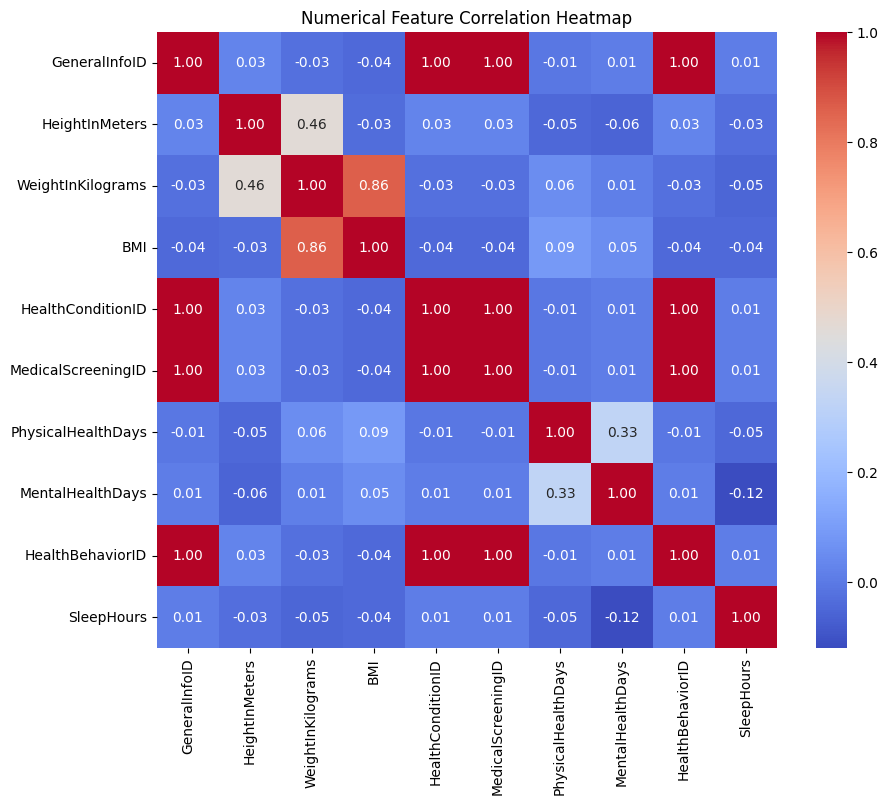

Index(['GeneralInfoID', 'State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HealthConditionID',
       'MedicalScreeningID', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'HealthBehaviorID',
       'PhysicalActivities', 'SleepHours', 'SmokerStatus', 'ECigaretteUsage',
       'AlcoholDrinkers', 'LastCheckupTime', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',
       'ChestScan'],
      dtype='object')


<ipython-input-9-2c3bc265dfc9>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[col] = label_encoder.fit_transform(selected_columns[col])
<ipython-input-9-2c3bc265dfc9>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[col] = label_encoder.fit_transform(selected_columns[col])
<ipython-input-9-2c3bc265dfc9>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

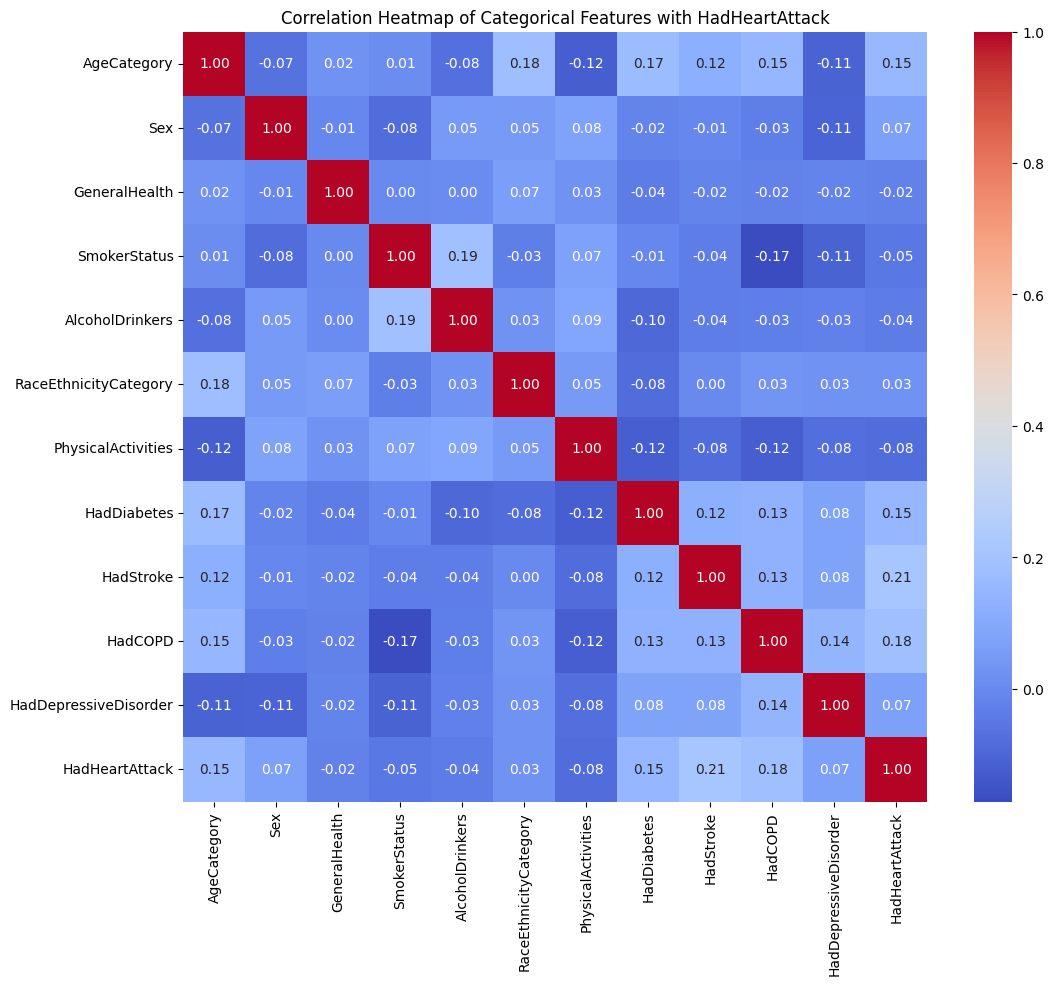

<ipython-input-9-2c3bc265dfc9>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-9-2c3bc265dfc9>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-9-2c3bc265dfc9>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-9-2c3bc265dfc9>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-9-2c3bc265dfc9>:64: FutureWarning: 

Pass

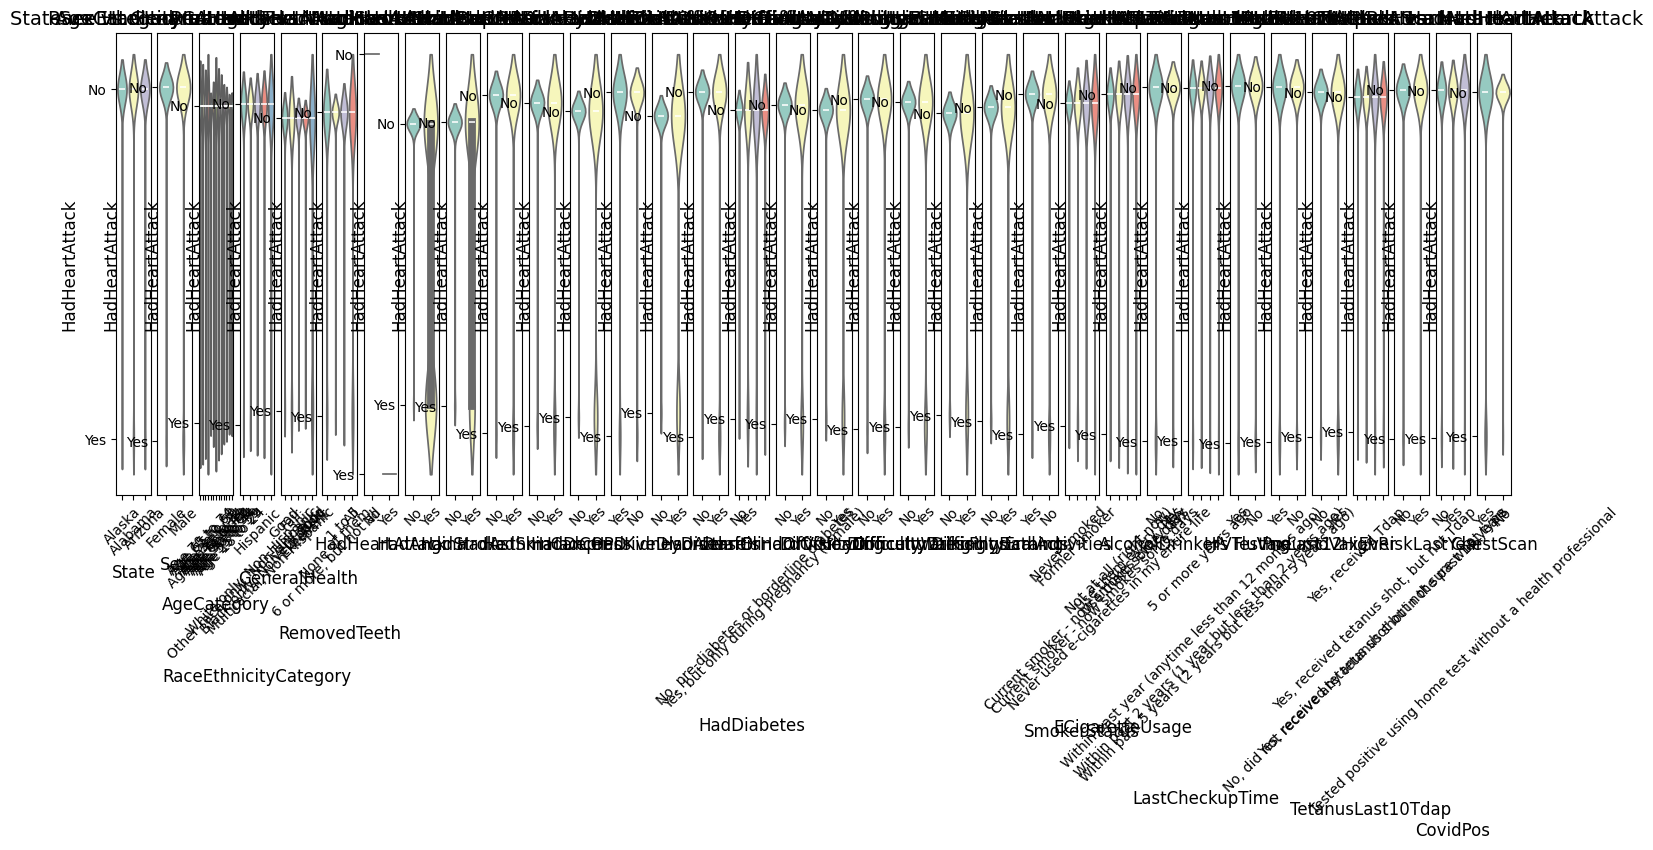

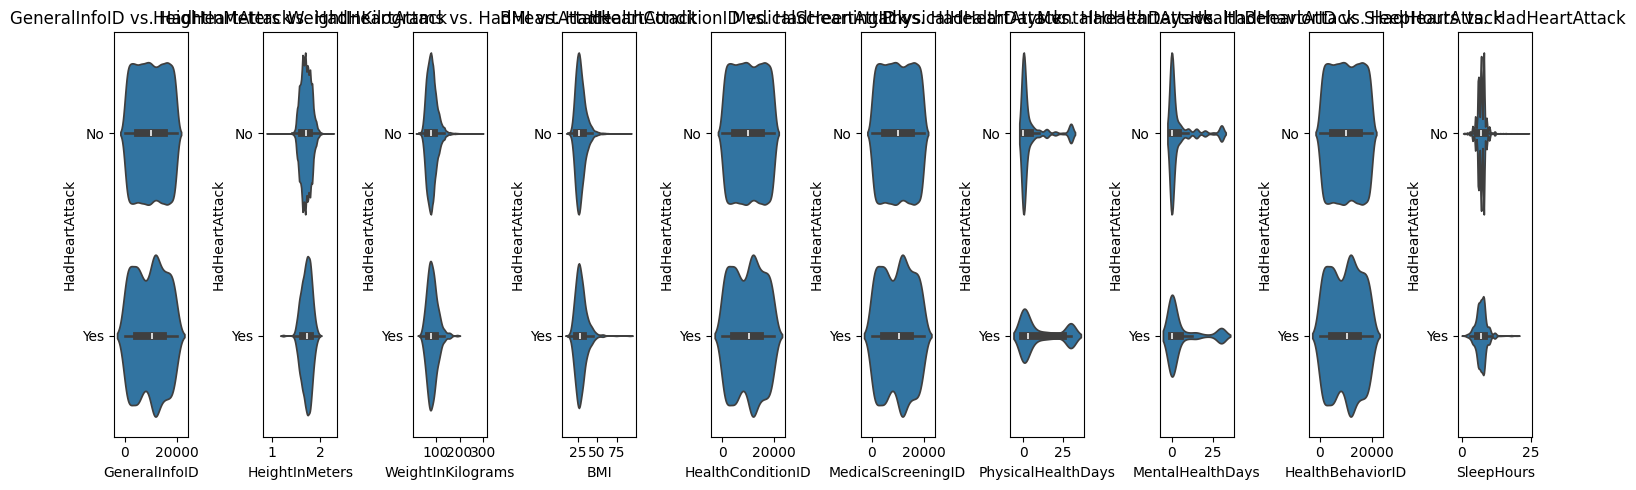

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset, replace 'df' with your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Assuming 'target' is your target variable name
target = 'HadHeartAttack'

# Assuming 'categorical_features' is a list of categorical feature names
categorical_features = categorical_columns

# Assuming 'numerical_features' is a list of numerical feature names
numerical_features = numerical_columns

# Compute correlation matrix for numerical features
num_corr = df_filled[numerical_features].corr()
#print(num_corr)
#print(df_filled.columns)
#print(categorical_features)
# Compute correlation matrix for categorical features
#cat_corr = df_filled[categorical_features].corr()

# Plot numerical feature correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Numerical Feature Correlation Heatmap")
plt.show()

print(df_filled.columns)
from sklearn.preprocessing import LabelEncoder

# Define the categorical columns of interest
categorical_columns_of_interest = [
    'AgeCategory', 'Sex', 'GeneralHealth', 'SmokerStatus', 'AlcoholDrinkers',
    'RaceEthnicityCategory', 'PhysicalActivities', 'HadDiabetes',
    'HadStroke', 'HadCOPD', 'HadDepressiveDisorder', 'HadHeartAttack'
]

# Select the relevant columns from the DataFrame
selected_columns = df_filled[categorical_columns_of_interest]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in selected_columns.columns:
    selected_columns[col] = label_encoder.fit_transform(selected_columns[col])

# Compute the correlation matrix
corr_matrix = selected_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Categorical Features with HadHeartAttack")
plt.show()

plt.figure(figsize=(18, 6))  # Increased figure size for better spacing

for i, feature in enumerate(categorical_columns_of_interest):
    plt.subplot(1, len(categorical_columns_of_interest), i + 1)
    sns.violinplot(
        x=feature,
        y=target,
        data=df_filled,
        #showmeans=True,  # Add means for better comparison
        palette="Set3",  # Use a color palette for better distinction
    )

    # Rotate x-axis labels for readability (optional)
    plt.xticks(rotation=45)

    # Adjust title and label font sizes
    plt.title(f"{feature} vs. {'HadHeartAttack'}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target, fontsize=12)

plt.tight_layout()
plt.show()

#need to limit nunerical feature to few points

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.violinplot(x=feature, y=target, data=df_filled)
    plt.title(f"{feature} vs. {target}")
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

class DataPreprocessor12:
    def __init__(self,c,n):
        self.encoder = None
        self.scaler = None
        self.categorical_columns = c
        self.numerical_columns = n

    def missing_values(self, df, categorical_columns, numerical_columns):
        for column in categorical_columns:
            most_frequent = df[column].mode()[0]
            df[column].fillna(most_frequent, inplace=True)

        mean_values = df[numerical_columns].mean()
        mean_values_rounded = mean_values.round(2)
        for col in numerical_columns:
            df[col] = df[col].fillna(mean_values_rounded[col])
        return df

    def one_hot_encoding(self, df, categorical_columns):
        self.encoder = OneHotEncoder(drop=None, sparse=False)
        encoded_data = self.encoder.fit_transform(df[categorical_columns])
        encoded_columns = self.encoder.get_feature_names_out(input_features=categorical_columns)
        df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)
        df_encoded = pd.concat([df.drop(columns=categorical_columns), df_encoded], axis=1)
        return df_encoded

    def scale_numerical_data(self, df, numerical_columns):
        self.scaler = StandardScaler()
        scaled_data = self.scaler.fit_transform(df[numerical_columns])
        scaled_data_temp = np.round(np.abs(scaled_data), 2)
        df_scaled = pd.DataFrame(scaled_data_temp, columns=numerical_columns, index=df.index)
        df = df.drop(columns=numerical_columns)
        df = pd.concat([df, df_scaled], axis=1)
        return df

    def fit(self, X, y=None):
        return self

    def transform(self, df):
        df = self.missing_values(df, self.categorical_columns, self.numerical_columns)
        df = self.one_hot_encoding(df, self.categorical_columns)
        df = self.scale_numerical_data(df, self.numerical_columns)
        return df


In [ ]:
# Create an instance of the DataPreprocessor12 class
preprocessor = DataPreprocessor12(categorical_columns, numerical_columns)
num = ['HeightInMeters', 'WeightInKilograms', 'BMI','PhysicalHealthDays', 'MentalHealthDays','SleepHours']

# Fit the preprocessor on the DataFrame
preprocessor.fit(df_filled, categorical_columns)

# Transform the data using the preprocessor
df_processed = preprocessor.transform(df_filled)

# Print the processed DataFrame
print(df_processed)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


       State_Alabama  State_Alaska  State_Arizona  Sex_Female  Sex_Male  \
8289             0.0           1.0            0.0         1.0       0.0   
1042             1.0           0.0            0.0         1.0       0.0   
19758            0.0           0.0            1.0         1.0       0.0   
12257            0.0           0.0            1.0         1.0       0.0   
1192             1.0           0.0            0.0         1.0       0.0   
...              ...           ...            ...         ...       ...   
4326             1.0           0.0            0.0         0.0       1.0   
14861            0.0           0.0            1.0         0.0       1.0   
5641             0.0           1.0            0.0         1.0       0.0   
15706            0.0           0.0            1.0         0.0       1.0   
19482            0.0           0.0            1.0         0.0       1.0   

       AgeCategory_Age 18 to 24  AgeCategory_Age 25 to 29  \
8289                        0.0       

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title = 'Profiling Report')
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
numerical_columns = df_processed.select_dtypes(include=['number']).columns

print("Numerical columns:")
print(numerical_columns)
non_numeric_df = df_processed.select_dtypes(exclude=['number']).columns
print(non_numeric_df)

Numerical columns:
Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'Sex_Female',
       'Sex_Male', 'AgeCategory_Age 18 to 24', 'AgeCategory_Age 25 to 29',
       'AgeCategory_Age 30 to 34', 'AgeCategory_Age 35 to 39',
       'AgeCategory_Age 40 to 44',
       ...
       'GeneralInfoID', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'HealthConditionID', 'MedicalScreeningID', 'PhysicalHealthDays',
       'MentalHealthDays', 'HealthBehaviorID', 'SleepHours'],
      dtype='object', length=109)
Index([], dtype='object')


In [ ]:
df_processed['HadHeartAttack']=df_filled['HadHeartAttack']

In [ ]:
df_processed['HadHeartAttack'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [ ]:
df_processed = df_processed.drop('HadHeartAttack_Yes', axis=1)

In [ ]:
df_processed = df_processed.drop('HadHeartAttack_No', axis=1)

In [ ]:
num = ['HadHeartAttack_Yes','HadHeartAttack_No']

# Drop only the columns that are in the list 'num'
numerical_columns = [col for col in numerical_columns if col not in num]

In [ ]:
numerical_columns

['State_Alabama',
 'State_Alaska',
 'State_Arizona',
 'Sex_Female',
 'Sex_Male',
 'AgeCategory_Age 18 to 24',
 'AgeCategory_Age 25 to 29',
 'AgeCategory_Age 30 to 34',
 'AgeCategory_Age 35 to 39',
 'AgeCategory_Age 40 to 44',
 'AgeCategory_Age 45 to 49',
 'AgeCategory_Age 50 to 54',
 'AgeCategory_Age 55 to 59',
 'AgeCategory_Age 60 to 64',
 'AgeCategory_Age 65 to 69',
 'AgeCategory_Age 70 to 74',
 'AgeCategory_Age 75 to 79',
 'AgeCategory_Age 80 or older',
 'RaceEthnicityCategory_Black only, Non-Hispanic',
 'RaceEthnicityCategory_Hispanic',
 'RaceEthnicityCategory_Multiracial, Non-Hispanic',
 'RaceEthnicityCategory_Other race only, Non-Hispanic',
 'RaceEthnicityCategory_White only, Non-Hispanic',
 'GeneralHealth_Excellent',
 'GeneralHealth_Fair',
 'GeneralHealth_Good',
 'GeneralHealth_Poor',
 'GeneralHealth_Very good',
 'RemovedTeeth_1 to 5',
 'RemovedTeeth_6 or more, but not all',
 'RemovedTeeth_All',
 'RemovedTeeth_None of them',
 'HadAngina_No',
 'HadAngina_Yes',
 'HadStroke_No',
 '

In [ ]:
!pip install lazypredict-nightly

In [ ]:
import lazypredict
from lazypredict import LazyClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = df_processed
y= data['HadHeartAttack']

X = data.drop(['HadHeartAttack'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [01:04<00:01,  1.15s/it]

[LightGBM] [Info] Number of positive: 832, number of negative: 11968
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 817
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 103
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.065000 -> initscore=-2.666159
[LightGBM] [Info] Start training from score -2.666159


100%|██████████| 29/29 [01:04<00:00,  2.22s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.75               0.78     0.78      0.81   
NearestCentroid                    0.82               0.78     0.78      0.86   
BernoulliNB                        0.83               0.75     0.75      0.87   
LinearDiscriminantAnalysis         0.92               0.71     0.71      0.92   
DecisionTreeClassifier             0.90               0.64     0.64      0.90   
SGDClassifier                      0.93               0.60     0.60      0.92   
ExtraTreeClassifier                0.90               0.60     0.60      0.90   
CalibratedClassifierCV             0.94               0.60     0.60      0.92   
PassiveAggressiveClassifier        0.92               0.60     0.60      0.91   
LogisticRegression                 0.94               0.59     0.59      0.92   
XGBClassifier               

In [ ]:
!pip install scikit-learn lightgbm xgboost mlflow

In [ ]:
import os
import pandas as pd
import mlflow
from mlflow.models import infer_signature
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined

# Models
pipelines = {
    'decisiontree': make_pipeline(DecisionTreeClassifier()),
    'extratrees': make_pipeline(ExtraTreesClassifier()),
    'gradientbooster': make_pipeline(GradientBoostingClassifier()),
    'randomforest': make_pipeline(RandomForestClassifier()),
    'knn': make_pipeline(KNeighborsClassifier()),
    'xgbclassifier': make_pipeline(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
}

MLFLOW_TRACKING_URI = "https://dagshub.com/atul.ammy01/Team22_PythonProject.mlflow"
os.environ['MLFLOW_TRACKING_USERNAME'] = 'atul.ammy01'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '49669d93d3df8bc51346678fd3ff5e69f2b2a6a6'

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri=MLFLOW_TRACKING_URI)
mlflow.set_experiment("Heart_Attack_test")

def log_confusion_matrix(y_true, y_pred, run_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {run_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig('confusion_matrix.png')
    mlflow.log_artifact('confusion_matrix.png')
    plt.close()

fit_models = {}
for algo, model in pipelines.items():
    with mlflow.start_run(run_name=algo):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mlflow.log_params(model.get_params())
        mlflow.log_metric("accuracy_score", accuracy_score(y_test, y_pred))
        mlflow.log_metric("balanced_accuracy_score", balanced_accuracy_score(y_test, y_pred))
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision_score", precision_score(y_test, y_pred))
        mlflow.log_metric("recall_score", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))

        log_confusion_matrix(y_test, y_pred, algo)

        signature = infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            signature=signature,
            input_example=X_train,
            registered_model_name=algo
        )

        fit_models[algo] = model

# Select top 3 models based on accuracy
top_3_models = sorted(fit_models.items(), key=lambda item: accuracy_score(y_test, item[1].predict(X_test)), reverse=True)[:3]

# Hyperparameter tuning
param_grids = {
    'extratrees': {
        'extratreesclassifier__max_depth': [5, 8, 10, None],
        'extratreesclassifier__n_estimators': [50, 100, 150]
    },
    'gradientbooster': {
        'gradientboostingclassifier__min_samples_leaf': [2, 5, 8, 10],
        'gradientboostingclassifier__n_estimators': [50, 100, 200]
    },
    'decisiontree': {
        'decisiontreeclassifier__min_samples_leaf': [4, 5, 6, 9],
        'decisiontreeclassifier__max_depth': [3, 5, 7, None]
    },
    'randomforest': {
        'randomforestclassifier__n_estimators': [50, 100, 150],
        'randomforestclassifier__max_depth': [5, 10, 15, None],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4]
    },
    'knn': {
        'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'xgbclassifier': {
        'xgbclassifier__n_estimators': [50, 100, 200],
        'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
        'xgbclassifier__max_depth': [3, 5, 7, 10]
    }
}

# Perform hyperparameter tuning on top 3 models
for algo, pipeline in top_3_models:
    grid_search = GridSearchCV(pipeline, param_grids[algo], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    with mlflow.start_run(run_name=f"{algo}_tuned"):
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("accuracy_score", accuracy_score(y_test, y_pred))
        mlflow.log_metric("balanced_accuracy_score", balanced_accuracy_score(y_test, y_pred))
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision_score", precision_score(y_test, y_pred))
        mlflow.log_metric("recall_score", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))

        log_confusion_matrix(y_test, y_pred, f"{algo}_tuned")

        signature = infer_signature(X_train, best_model.predict(X_train))
        mlflow.sklearn.log_model(
            sk_model=best_model,
            artifact_path="model",
            signature=signature,
            input_example=X_train,
            registered_model_name=f"{algo}_tuned"
        )

# Drop features based on feature importance
important_features = {
    'decisiontree': ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'Sex_Male'],
    'extratrees': ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'Sex_Male', 'AgeCategory_Age 60 to 64'],
    'gradientbooster': ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'Sex_Male', 'GeneralHealth_Poor'],
    'randomforest': ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'Sex_Male', 'GeneralHealth_Good'],
    'knn': ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'Sex_Male', 'GeneralHealth_Poor'],
    'xgbclassifier': ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'Sex_Male', 'GeneralHealth_Poor']
}

for algo, features in important_features.items():
    X_train_imp = X_train[features]
    X_test_imp = X_test[features]

    pipeline = make_pipeline(pipelines[algo].steps[-1][1])
    pipeline.fit(X_train_imp, y_train)
    y_pred = pipeline.predict(X_test_imp)

    with mlflow.start_run(run_name=f"{algo}_imp"):
        mlflow.log_params(pipeline.get_params())
        mlflow.log_metric("accuracy_score", accuracy_score(y_test, y_pred))
        mlflow.log_metric("balanced_accuracy_score", balanced_accuracy_score(y_test, y_pred))
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision_score", precision_score(y_test, y_pred))
        mlflow.log_metric("recall_score", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))

        log_confusion_matrix(y_test, y_pred, f"{algo}_imp")

        signature = infer_signature(X_train_imp, pipeline.predict(X_train_imp))
        mlflow.sklearn.log_model(
            sk_model=pipeline,
            artifact_path="model",
            signature=signature,
            input_example=X_train_imp,
            registered_model_name=f"{algo}_imp"
        )

# Combine features
combined_features_train = {
    'BMI_PhysicalHealthDays': X_train['BMI'] * X_train['PhysicalHealthDays'],
    'BMI_MentalHealthDays': X_train['BMI'] * X_train['MentalHealthDays'],
    'SleepHours_MentalHealthDays': X_train['SleepHours'] * X_train['MentalHealthDays'],
    'PhysicalHealthDays_MentalHealthDays': X_train['PhysicalHealthDays'] * X_train['MentalHealthDays']
}

combined_features_test = {
    'BMI_PhysicalHealthDays': X_test['BMI'] * X_test['PhysicalHealthDays'],
    'BMI_MentalHealthDays': X_test['BMI'] * X_test['MentalHealthDays'],
    'SleepHours_MentalHealthDays': X_test['SleepHours'] * X_test['MentalHealthDays'],
    'PhysicalHealthDays_MentalHealthDays': X_test['PhysicalHealthDays'] * X_test['MentalHealthDays']
}

# Add new combined features to the dataset
X_train_comb = X_train.copy()
X_test_comb = X_test.copy()
for feat_name in combined_features_train:
    X_train_comb[feat_name] = combined_features_train[feat_name]
    X_test_comb[feat_name] = combined_features_test[feat_name]

# Fit models with the new combined features and log experiments in MLflow
fit_models_comb = {}
for algo, model in pipelines.items():
    with mlflow.start_run(run_name=f"{algo}_combined"):
        model.fit(X_train_comb, y_train)
        y_pred = model.predict(X_test_comb)

        mlflow.log_params(model.get_params())
        mlflow.log_metric("accuracy_score", accuracy_score(y_test, y_pred))
        mlflow.log_metric("balanced_accuracy_score", balanced_accuracy_score(y_test, y_pred))
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))
        mlflow.log_metric("precision_score", precision_score(y_test, y_pred))
        mlflow.log_metric("recall_score", recall_score(y_test, y_pred))
        mlflow.log_metric("roc_auc_score", roc_auc_score(y_test, y_pred))

        log_confusion_matrix(y_test, y_pred, f"{algo}_combined")

        signature = infer_signature(X_train_comb, model.predict(X_train_comb))
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="model",
            signature=signature,
            input_example=X_train_comb,
            registered_model_name=f"{algo}_combined"
        )

        fit_models_comb[algo] = model


2024/05/16 20:25:57 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under mlflow-artifacts:/b3a1a1e1b0374dc7bdc5fd2b3a5d8819/f1ae9ed0809e47d884d1621d983dde6c/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
Registered model 'decisiontree' already exists. Creating a new version of this model...
2024/05/16 20:25:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: decisiontree, version 10
Created version '10' of model 'decisiontree'.
2024/05/16 20:26:17 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under mlflow-artifacts:/b3a1a1e1b0374dc7bdc5fd2b3a5d8819/c3f3ab3b890c421c8de3e7c84b58b706/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel

In [ ]:
import mlflow

# List all registered models
all_models = mlflow.search_model_versions()

# Filter models based on your criteria (e.g., metrics)
# You might have to adjust this based on how your models are logged
best_model = None
best_metric = float('-inf')

for _, row in all_models.iterrows():
    metrics = mlflow.get_metrics(row["run_id"])
    if "accuracy" in metrics:  # Replace "your_metric" with the metric you use to evaluate model performance
        metric_value = metrics["accuracy"]
        if metric_value > best_metric:
            best_metric = metric_value
            best_model = row

# Now, best_model contains information about the best model
best_model

In [ ]:
best_model

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
import xgboost as xgb

# Assuming the last step of the pipeline is the XGBoost model
xgb_model = best_model[-1].get_booster()

# Save the XGBoost model
best_model.save_model("C:\Users\ambal\OneDrive\Desktop\best_xgb_model.model")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-34-8b2ac6de9ec3>, line 7)

In [ ]:
# Use a Python base image
FROM python:3.8-slim

# Set the working directory in the container
WORKDIR /app

# Copy the XGBoost model file into the container
COPY best_xgb_model.model /app

# Install xgboost
RUN pip install xgboost

# Copy your inference script (if any) into the container
# COPY inference_script.py /app

# Command to run your inference script or server
# CMD ["python", "inference_script.py"]


SyntaxError: invalid syntax (<ipython-input-33-e13363b2cd82>, line 2)